# Group Assignment Chapter 2

## AI Project#2 | Data Analytics Challenge


![RRA Logo](RRA_Logo.png)

### Problem Statement
Solutions governments of poor economies have implemented for insight into how a simpler tax system with a limited number of rates is critical to fostering taxpayer compliance, as seen in the Georgia example. Notably, in fragile states, focus first on simplifying taxes, procedures, and structures. The simplicity of the tax system and legislation is the guiding principle for fragile states. This makes tax administration less challenging in weak states that lack such basic institutions as security and a well-functioning judicial system. Curbing exemptions can also reduce the tax system’s complexity while boosting revenue by broadening the tax base. Many countries incur a sizable loss of revenue through ill-designed exemptions, such as costly tax holidays and other incentives that fail to attract investment. And discretionary granting of exemptions provides opportunities for corruption. Reform indirect taxes on goods and services. The VAT has proved to be an efficient and strong revenue booster: countries that impose this tax tend to raise more revenue than those that don’t (Keen and Lockwood 2010). In addition to reducing the rate, Georgia streamlined its VAT refund mechanism, allowing revenue from this source to rise from 8.5 percent of GDP in 2005 to about 11.5 percent in 2009.

The VAT was broad-based, with a single rate of 16 percent and a limited number of exemptions for financial, medical, and educational services. As part of its reform, Ukraine also curbed VAT exemptions and revised the regime for agriculture by reducing the rate and eliminating refunds.


**First-principles (What we know to be true ):**
Rwanda is not a highly developed and diversified economy. A tax is a compulsory financial charge or some other type of levy imposed on a taxpayer by a governmental organization in order to fund government spending and various public expenditures. In order to increase tax revenue, we either need to raise broaden the tax base or increase the tax on certain taxpayers (quantity vs quality)

**Questions to be answered during the analysis:**
1. What percentage of GDP does the tax account for (over the years )
2. In what categories(What type of tax) did the government earn the most and least tax(over the years )?
3. How much income tax did the government collect tax(over the years )?
4. What is the correlation between GDP per capita and happiness score?
5. What is the correlation between the GDP and total tax revenue collected over the years?
6. What are the proportions of each sentiment for the news headline/tweets?


### Data Analytics Workflow
This image below explains in summary our group's Data Analytics Approach towards the completion of our bids proposal:
![DA_Workflow](Data_Analytics_Workflow.png)

### Environment Configuration

#### Tools
- Anaconda *v.2020.11*
- Jupyter Notebook *v.6.1.4*
- Python *v.3.8*

#### Libraries
- Numpy *v.1.19.2*
- Pandas *v.1.1.3*
- Scipy *v.1.5.2*
- Matplotlib *v.3.3.2*
- Seaborn *v.0.11.0*
- BeautifulSoup4 *v.4.9.3*
- Requests *2.24.0*

### Datasets
**#1 Dataset:**  
**Title:** Details of Public Revenues (RW)  
**Description:** This dataset contains a detailed statistics of tax and non-tax revenues in Rwanda.  
**Source:**
* [1] "Details of Public Revenues - Rwanda", Stats.oecd.org, 2021. [Online]. Available: https://stats.oecd.org/Index.aspx?DataSetCode=REVRWA#. [Accessed: 06- Mar- 2021].

**#2 Dataset:**  
**Title:** Tweet Sentiment Data  
**Description:** This dataset contains the sentiments extracted from different tweets.  
**Source:**
* [2] "Complete Tweet Sentiment Extraction Data", Kaggle.com, 2021. [Online]. Available: https://www.kaggle.com/maxjon/complete-tweet-sentiment-extraction-data. [Accessed: 06- Mar- 2021].

**#3 Dataset:**  
**Title:** Financial News Headline Data  
**Description:** This dataset contains the sentiments for financial news headlines from the perspective of a retail investor.   
**Source:**  
* [3] "Sentiment Analysis for Financial News", Kaggle.com, 2021. [Online]. Available: https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news. [Accessed: 06- Mar- 2021].

**#4 Dataset:**  
**Title:** GDP Per Capita per Countries | GDP per Countries   
**Description:** This dataset contains the GDP per Capita and GDP of all countries worldwide.  
**Source:** 
* [4] "GDP per capita (current US dollars) - Rwanda | Data", Data.worldbank.org, 2021. [Online]. Available: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?end=2019&locations=RW&start=2012. [Accessed: 06- Mar- 2021].
* [5]"GDP (current US dollars) - Rwanda | Data", Data.worldbank.org, 2021. [Online]. Available: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=RW. [Accessed: 06- Mar- 2021].

**#5 Dataset:**  
**Title:** World Happiness Report  
**Description:** This dataset contains the happiness, social support, healthy life expectancy, freedom to make life choices, generosity and perceptions of corruption score of all the countries worldwide.  
**Source:**
* [6] "World Happiness Report", En.wikipedia.org, 2021. [Online]. Available: https://en.wikipedia.org/wiki/World_Happiness_Report. [Accessed: 06- Mar- 2021]. 


### Useful Links
- **Github:** [LINK](https://github.com/Mahalinoro/3C2_data_analytics_challenge)
- **Methodology:**
- **Documentation:**
- **Slidedeck:**
- **Video Presentation:**

### References

## Import Libraries

In [170]:
import numpy as np # Library for multi-dimensional arrays and matrices operations
import pandas as pd # Library for data analysis
import matplotlib.pyplot as plt # Library for plotting and visualization
import seaborn as sns # Library for plotting and visualization
import requests # Library to handle requests

from bs4 import BeautifulSoup # Library to parse HTML documents
from scipy import stats # Library for scientific and technical computing
from scipy.stats import describe

%matplotlib inline

## Step 1: Data Ingestion from different Sources

In [171]:
# Load and read the data

# Financial News Headline Data
finance_news = pd.read_csv("datasets/financial_news_headline.csv", encoding="latin-1")

# Tweets Data
tweets = pd.read_csv("datasets/tweet_dataset.csv")

# Public Revenues Data
revenues = pd.read_csv("datasets/tax_revenue_rw.csv")

# GDP per Capita Data
GDP_per_capita = pd.read_csv("datasets/GDPperCap.csv", skiprows=4)

# GDP Data
GDP = pd.read_csv("datasets/GDP.csv", skiprows=4)

# Happiness Report 2016-2020
url = "https://en.wikipedia.org/wiki/World_Happiness_Report"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(url)
response.status_code

if response.status_code == 200:
    # parse data from the html into a beautifulsoup object
    soup = BeautifulSoup(response.text, 'html.parser')
    happi=soup.find_all('table',{'class':"wikitable"}) # find all the data tables in the url page

# 2020
happ_2020=pd.read_html(str(happi[0]))
# convert list to dataframe
happ_2020=pd.DataFrame(happ_2020[0])
# 2019
happ_2019=pd.read_html(str(happi[1]))
happ_2019=pd.DataFrame(happ_2019[0])
# 2018
happ_2018=pd.read_html(str(happi[2]))
happ_2018=pd.DataFrame(happ_2018[0])
# 2017
happ_2017=pd.read_html(str(happi[3]))
happ_2017=pd.DataFrame(happ_2017[0])
# 2016
happ_2016=pd.read_html(str(happi[4]))
happ_2016=pd.DataFrame(happ_2016[0])

## Step 2: Data Integration

### 2.1. Data Pre-processing and Cleaning

In [172]:
# Check head and tail
finance_news.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [173]:
finance_news.tail()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...
4844,negative,Sales in Finland decreased by 10.5 % in Januar...


In [174]:
# Understand the data
finance_news.shape

(4845, 2)

In [175]:
finance_news.dtypes

neutral                                                                                                                            object
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    object
dtype: object

In [176]:
finance_news.columns

Index(['neutral', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'], dtype='object')

In [177]:
finance_news.neutral.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [178]:
tweets.head()

,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier a...,@tiffanylue i know i was listenin to bad habi...,p1000000000,NaN,NaN
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,c811396dc2,negative,headache
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,9063631ab1,negative,gloomy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON!,2a815f151d,positive,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,We want to trade with someone who has Houston...,@dannycastillo We want to trade with someone w...,82565a56d3,neutral,We want to trade with someone who has Houston ...


In [179]:
tweets.tail()

,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
39995,1753918954,neutral,showMe_Heaven,NaN,@JohnLloydTaylor,p1000008985,neutral,NaN
39996,1753919001,love,drapeaux,Happy Mothers Day All my love,Happy Mothers Day All my love,0b62ea4f2d,positive,Happy
39997,1753919005,love,JenniRox,Happy Mother`s Day to all the mommies out ther...,Happy Mother's Day to all the mommies out ther...,1adaa3519d,positive,Happy Mother`s Day
39998,1753919043,happiness,ipdaman1,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY ...,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,d63253be9a,neutral,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY N...
39999,1753919049,love,Alpharalpha,bullet train from tokyo the gf and i have ...,@mopedronin bullet train from tokyo the gf ...,879f64f30d,neutral,bullet train from tokyo the gf and i have b...


In [180]:
tweets.shape

(40000, 8)

In [181]:
tweets.dtypes

textID            int64
sentiment        object
author           object
text             object
old_text         object
aux_id           object
new_sentiment    object
selected_text    object
dtype: object

In [182]:
tweets.columns

Index(['textID', 'sentiment', 'author', 'text', 'old_text', 'aux_id',
       'new_sentiment', 'selected_text'],
      dtype='object')

In [183]:
tweets.sentiment.unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [184]:
tweets.new_sentiment.unique()

array([nan, 'negative', 'positive', 'neutral'], dtype=object)

In [185]:
GDP_per_capita.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24713.698045,26189.435509,26647.938101,27980.880695,28281.350482,29007.693003,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,641.871479,637.165523,613.856689,578.466353,509.218661,519.884773,493.750418,507.103432,NaN,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3289.646664,2790.726615,NaN,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5353.244856,NaN,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,38686.461264,39538.766722,41303.929371,35762.523074,37474.665406,38962.880354,41793.055258,40886.391165,NaN,NaN


In [186]:
GDP_per_capita.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
259,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3596.804655,3891.266363,4080.330717,3603.025501,3780.003689,4045.614209,4419.914327,4417.524062,NaN,NaN
260,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1446.536354,1607.152365,1673.146354,1602.037841,1138.682995,960.528534,824.117629,774.334490,NaN,NaN
261,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,443.009816,454.962013,473.011615,511.497253,548.995942,584.704072,...,7501.469984,6832.456891,6433.187277,5734.633629,5272.918425,6132.479841,6374.028196,6001.400814,NaN,NaN
262,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188867,220.042137,212.578123,213.896441,242.384333,303.281910,...,1763.072733,1878.909697,1763.062571,1337.795586,1280.578447,1534.866751,1516.390661,1305.063254,NaN,NaN
263,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,278.813699,280.828951,276.688781,277.479715,281.558440,293.308854,...,1304.969802,1430.000818,1434.899340,1445.071062,1464.583529,1548.170056,1683.740577,1463.985910,NaN,NaN


In [187]:
GDP_per_capita.shape

(264, 66)

In [188]:
GDP_per_capita.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
Unnamed: 65       float64
Length: 66, dtype: object

In [189]:
GDP_per_capita.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [190]:
GDP_per_capita.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
count,131.000000,132.000000,135.000000,135.000000,135.000000,144.000000,148.000000,152.000000,156.000000,156.000000,...,253.000000,253.000000,253.000000,252.000000,251.000000,251.000000,249.000000,230.000000,0.0,0.0
mean,478.827876,495.516255,518.353460,549.833529,596.749761,667.208784,727.692617,740.108296,759.810803,823.277204,...,16144.223602,16753.236093,17066.702844,15470.904580,15633.472678,16434.282276,17290.055343,14876.107365,NaN,NaN
std,618.839840,642.554718,671.606285,711.312015,777.885788,871.593235,941.178031,970.490121,1002.043008,1078.948060,...,23506.823321,25081.735703,25798.876210,23314.636043,23585.530145,24455.167919,26146.057567,20246.682080,NaN,NaN
min,40.537115,40.689390,34.790581,40.752237,41.083814,45.989354,37.488783,46.642770,48.784045,51.794609,...,252.358980,256.976003,274.857948,305.549773,282.193130,292.997631,271.752044,261.247473,NaN,NaN
25%,103.603349,107.508558,112.691600,118.254316,123.624652,138.332465,143.739004,152.748019,150.767816,158.642329,...,1859.733550,2248.591321,2206.051934,2132.199426,2181.866378,2175.189153,2314.050681,2118.309235,NaN,NaN
50%,210.109899,198.787364,212.578123,226.899989,238.048532,263.338850,272.491150,272.553684,289.233702,302.009809,...,6586.456756,6837.712892,6684.807367,6202.488863,6060.093329,6376.706716,6941.235848,6573.367264,NaN,NaN
75%,476.544679,485.989049,531.266708,583.852429,652.416582,719.969136,879.530413,840.885676,786.780925,841.148633,...,19870.801212,20143.664449,20035.173975,17879.517099,18506.242424,19308.138162,19406.347534,17435.698160,NaN,NaN
max,3007.123445,3066.562869,3243.843078,3374.515171,3573.941185,4443.405272,4571.181955,4336.426587,4695.923390,5032.144743,...,157515.899069,177664.115616,189422.218769,167290.939984,170028.655718,173356.051288,185829.017960,117089.286273,NaN,NaN


In [191]:
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.881570e+10,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09,NaN,NaN


In [192]:
GDP.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.499807e+09,7.074778e+09,7.396705e+09,6.442916e+09,6.719172e+09,7.245707e+09,7.942962e+09,7.926134e+09,NaN,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.540134e+10,4.041524e+10,4.320647e+10,4.245062e+10,3.093598e+10,2.673614e+10,2.348627e+10,2.258108e+10,NaN,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,...,3.963327e+11,3.668294e+11,3.509046e+11,3.176205e+11,2.963573e+11,3.495541e+11,3.682889e+11,3.514316e+11,NaN,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.550306e+10,2.804555e+10,2.715073e+10,2.124334e+10,2.095475e+10,2.586817e+10,2.631214e+10,2.330977e+10,NaN,NaN
263,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1.052990e+09,1.096647e+09,1.117602e+09,1.159512e+09,1.217138e+09,1.311436e+09,...,1.711485e+10,1.909102e+10,1.949552e+10,1.996312e+10,2.054868e+10,2.204090e+10,2.431156e+10,2.144076e+10,NaN,NaN


In [193]:
GDP.shape

(264, 66)

In [194]:
GDP.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
Unnamed: 65       float64
Length: 66, dtype: object

In [195]:
GDP.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [196]:
GDP.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
count,1.310000e+02,1.320000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.440000e+02,1.480000e+02,1.520000e+02,1.560000e+02,1.560000e+02,...,2.530000e+02,2.530000e+02,2.530000e+02,2.520000e+02,2.510000e+02,2.510000e+02,2.490000e+02,2.300000e+02,0.0,0.0
mean,7.106240e+10,7.248470e+10,7.602689e+10,8.188603e+10,8.991241e+10,9.203584e+10,1.050999e+11,1.086121e+11,1.141524e+11,1.262739e+11,...,2.435298e+12,2.524112e+12,2.598566e+12,2.456612e+12,2.496345e+12,2.674315e+12,2.869779e+12,3.142438e+12,NaN,NaN
std,2.128414e+11,2.213444e+11,2.356229e+11,2.533773e+11,2.770583e+11,2.926345e+11,3.209794e+11,3.386382e+11,3.617882e+11,3.982679e+11,...,8.226994e+12,8.470078e+12,8.705182e+12,8.267516e+12,8.415239e+12,8.959180e+12,9.575686e+12,1.009150e+13,NaN,NaN
min,1.201203e+07,1.159202e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583518e+07,1.460000e+07,1.585000e+07,...,3.767177e+07,3.750908e+07,3.729061e+07,3.549207e+07,3.654780e+07,4.061925e+07,4.258816e+07,4.727146e+07,NaN,NaN
25%,5.079241e+08,4.891902e+08,5.054587e+08,5.140250e+08,5.626974e+08,5.863716e+08,6.427026e+08,6.291233e+08,6.454036e+08,6.912229e+08,...,8.223337e+09,8.544449e+09,9.271534e+09,8.732012e+09,8.646612e+09,9.835078e+09,1.123917e+10,1.349677e+10,NaN,NaN
50%,2.760747e+09,2.966849e+09,2.814319e+09,3.540403e+09,3.405333e+09,2.952341e+09,3.157019e+09,3.377453e+09,3.925740e+09,4.473239e+09,...,4.647313e+10,5.155208e+10,5.366034e+10,4.973256e+10,5.120512e+10,5.332063e+10,5.801147e+10,6.689222e+10,NaN,NaN
75%,2.984726e+10,3.097461e+10,3.191097e+10,3.679857e+10,3.502369e+10,2.653880e+10,3.174812e+10,3.085566e+10,3.250068e+10,3.623239e+10,...,5.459824e+11,5.227615e+11,5.424771e+11,5.122616e+11,5.022958e+11,5.337638e+11,5.554554e+11,7.468397e+11,NaN,NaN
max,1.369444e+12,1.425115e+12,1.530069e+12,1.648305e+12,1.805674e+12,1.966277e+12,2.133345e+12,2.270952e+12,2.451449e+12,2.704652e+12,...,7.516178e+13,7.731634e+13,7.945325e+13,7.521772e+13,7.636900e+13,8.130603e+13,8.643942e+13,8.779853e+13,NaN,NaN


In [197]:
revenues.head()

,TAX,Revenue category,GOV,Level of government,YEA,Year,Value,Flag Codes,Flags
0,2310,2310 On a payroll basis of self/non-employed SSC,SOCSEC,Social Security Funds,1996,1996,1.677,NaN,NaN
1,2310,2310 On a payroll basis of self/non-employed SSC,SOCSEC,Social Security Funds,1997,1997,1.748,NaN,NaN
2,2310,2310 On a payroll basis of self/non-employed SSC,SOCSEC,Social Security Funds,1998,1998,2.623,NaN,NaN
3,2310,2310 On a payroll basis of self/non-employed SSC,SOCSEC,Social Security Funds,1999,1999,2.415,NaN,NaN
4,2310,2310 On a payroll basis of self/non-employed SSC,SOCSEC,Social Security Funds,2000,2000,2.994,NaN,NaN


In [198]:
revenues.tail()

,TAX,Revenue category,GOV,Level of government,YEA,Year,Value,Flag Codes,Flags
2939,TOTAL,Total tax and non-tax revenue,NES,Total,2014,2014,1380119.093,NaN,NaN
2940,TOTAL,Total tax and non-tax revenue,NES,Total,2015,2015,1526632.149,NaN,NaN
2941,TOTAL,Total tax and non-tax revenue,NES,Total,2016,2016,1636176.926,NaN,NaN
2942,TOTAL,Total tax and non-tax revenue,NES,Total,2017,2017,1805008.940,NaN,NaN
2943,TOTAL,Total tax and non-tax revenue,NES,Total,2018,2018,2052226.467,NaN,NaN


In [199]:
revenues.shape

(2944, 9)

In [200]:
revenues.dtypes

TAX                     object
Revenue category        object
GOV                     object
Level of government     object
YEA                      int64
Year                     int64
Value                  float64
Flag Codes             float64
Flags                  float64
dtype: object

In [201]:
revenues.columns

Index(['TAX', 'Revenue category', 'GOV', 'Level of government', 'YEA', 'Year',
       'Value', 'Flag Codes', 'Flags'],
      dtype='object')

In [202]:
revenues.GOV.unique()

array(['SOCSEC', 'NES', 'FED'], dtype=object)

In [203]:
revenues['Revenue category'].unique()

array(['2310 On a payroll basis of self/non-employed SSC',
       '5127 Other taxes on internat. trade and transactions not included within 5121 to 5126 inclusive',
       '1200 Taxes on income, profits and capital gains of corporates',
       'Non-tax revenue: Grants',
       '5220 Non-recurrent taxes on use of goods and perform activities',
       '2110 On a payroll basis of employees SSC',
       '4000 Taxes on property',
       '5212 Recurrent taxes paid by others: motor vehicles',
       '5121 Excises',
       '4110 Households recurrent taxes on immovable property',
       '1100 Taxes on income, profits and capital gains of individuals',
       '2210 On a payroll basis of employers SSC',
       '4500 Non-recurrent taxes on property',
       '1300 Unallocable between 1100 and 1200', 'Total tax revenue',
       '3000 Taxes on payroll and workforce',
       '5100 Taxes on production, sale, transfer, etc',
       '5200 Taxes on use of goods and perform activities',
       '5124 Taxes 

In [204]:
revenues.TAX.unique()

array(['2310', '5127', '1200', 'NTR_A', '5220', '2110', '4000', '5212',
       '5121', '4110', '1100', '2210', '4500', '1300', 'TOTALTAX', '3000',
       '5100', '5200', '5124', '5112', '1220', '4300', '5130', '2400',
       'TOTALNOGRANTS', '4200', '2300', '2100', '5123', '5126', '5111',
       'TOTALNONTAX', '5211', '4400', '4100', '2200', '5120', '1000',
       '5000', '6000', '5210', '2120', '1210', '2320', '5125', '5213',
       'NTR_E', '2220', '4120', '5128', '2000', '5122', '1110', '5110',
       '5113', '4600', '5300', 'TOTAL'], dtype=object)

In [205]:
revenues['Level of government'].unique()

array(['Social Security Funds', 'Total', 'Federal or Central government'],
      dtype=object)

In [206]:
happ_2020.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434


In [207]:
happ_2020.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
148,149,Central African Republic,3.476,0.041,0.000,0.000,0.293,0.254,0.028
149,150,Rwanda,3.312,0.343,0.523,0.572,0.604,0.236,0.486
150,151,Zimbabwe,3.299,0.426,1.048,0.375,0.377,0.151,0.081
151,152,South Sudan,2.817,0.289,0.553,0.209,0.066,0.210,0.111
152,153,Afghanistan,2.567,0.301,0.356,0.266,0.000,0.135,0.001


In [208]:
happ_2020.shape

(153, 9)

In [209]:
happ_2020.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [210]:
happ_2020.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,5.473255,0.868778,1.155562,0.692882,0.463542,0.189366,0.130719
std,44.311398,1.112288,0.372418,0.286862,0.254111,0.141139,0.100433,0.113087
min,1.000000,2.567000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,4.724000,0.576000,0.987000,0.495000,0.381000,0.115000,0.056000
50%,77.000000,5.515000,0.919000,1.204000,0.760000,0.483000,0.177000,0.098000
75%,115.000000,6.228000,1.169000,1.387000,0.867000,0.577000,0.256000,0.163000
max,153.000000,7.809000,1.537000,1.548000,1.138000,0.693000,0.570000,0.533000


In [211]:
happ_2020.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [212]:
happ_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [213]:
happ_2019.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [214]:
happ_2019.shape

(156, 9)

In [215]:
happ_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [216]:
happ_2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [217]:
happ_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407032,0.902263,1.209391,0.725372,0.392981,0.186237,0.110160
std,45.177428,1.113085,0.395674,0.299492,0.242173,0.143670,0.096204,0.094763
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.046500
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.179500,0.085000
75%,117.250000,6.184500,1.223500,1.452500,0.881750,0.508000,0.252000,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [218]:
happ_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [219]:
happ_2018.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076


In [220]:
happ_2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [221]:
happ_2017.head()

,Overall Rank,Change in rank,Country,Score,Change in score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust,Residual
0,1,3,Norway,7.537,0.039,1.616,1.534,0.797,0.635,0.362,0.316,2.277
1,2,1,Denmark,7.522,0.004,1.482,1.551,0.793,0.626,0.355,0.401,2.314
2,3,NaN,Iceland,7.504,0.003,1.481,1.611,0.834,0.627,0.476,0.154,2.323
3,4,2,Switzerland,7.494,0.015,1.565,1.517,0.858,0.620,0.291,0.367,2.277
4,5,NaN,Finland,7.469,0.056,1.444,1.540,0.809,0.618,0.245,0.383,2.430


In [222]:
happ_2017.tail()

,Overall Rank,Change in rank,Country,Score,Change in score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust,Residual
152,151,1,Rwanda,3.471,0.044,0.369,0.946,0.326,0.582,0.253,0.455,0.540
153,152,4,Syria,3.462,0.393,0.777,0.396,0.501,0.082,0.494,0.151,1.062
154,153,4,Tanzania,3.349,0.317,0.511,1.042,0.365,0.390,0.354,0.066,0.621
155,154,3,Burundi,2.905,NaN,0.092,0.630,0.152,0.060,0.204,0.084,1.683
156,155,NaN,Central African Republic,2.693,NaN,0.000,0.000,0.019,0.271,0.281,0.057,2.066


In [223]:
happ_2017.describe()

,Change in score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust,Residual
count,146.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.129301,0.984716,1.188871,0.551342,0.408761,0.246884,0.123097,1.850206
std,0.126794,0.420809,0.287245,0.237035,0.150001,0.134814,0.101629,0.500061
min,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.378000
25%,0.039000,0.663500,1.042500,0.370000,0.304000,0.154000,0.057000,1.591500
50%,0.089000,1.065000,1.254000,0.606000,0.437000,0.232000,0.090000,1.833000
75%,0.185750,1.318000,1.414000,0.723000,0.516500,0.323500,0.153500,2.145000
max,0.834000,1.871000,1.611000,0.949000,0.658000,0.838000,0.464000,3.117000


In [224]:
happ_2016.head()

,Overall Rank[47][48],Country,Score,Change OverPrior Year,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust
0,1,Denmark,7.526,-0.401,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Switzerland,7.509,0.035,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Iceland,7.501,0.000,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Norway,7.498,0.082,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Finland,7.413,-0.259,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
happ_2016.tail()

,Overall Rank[47][48],Country,Score,Change OverPrior Year,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust
152,153,Benin,3.484,0.154,NaN,NaN,NaN,NaN,NaN,NaN
153,154,Afghanistan,3.360,0.000,NaN,NaN,NaN,NaN,NaN,NaN
154,155,Togo,3.303,0.100,NaN,NaN,NaN,NaN,NaN,NaN
155,156,Syria,3.069,0.000,NaN,NaN,NaN,NaN,NaN,NaN
156,157,Burundi,2.905,0.000,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
happ_2016.describe()

,Overall Rank[47][48],Score,Change OverPrior Year,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust
count,157.000000,157.000000,157.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,79.000000,5.382185,0.032561,NaN,NaN,NaN,NaN,NaN,NaN
std,45.466105,1.141674,0.424816,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2.905000,-1.294000,NaN,NaN,NaN,NaN,NaN,NaN
25%,40.000000,4.404000,-0.170000,NaN,NaN,NaN,NaN,NaN,NaN
50%,79.000000,5.314000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,118.000000,6.269000,0.295000,NaN,NaN,NaN,NaN,NaN,NaN
max,157.000000,7.526000,1.285000,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
# Transform data, find and deal with missing values/outliers

# Rename finance_news columns data
finance_news = finance_news.rename(columns={'neutral':'Sentiment', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'News Headline'})
# Find Missing values Number
finance_news.Sentiment.isnull().sum(), finance_news['News Headline'].isnull().sum()

(0, 0)

In [228]:
# Remove unwanted columns in GDP and GDP_per_capita
# Narrow the data to only Rwanda

GDP_per_capita.drop(columns=['Country Code', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2020', 'Unnamed: 65'], inplace=True)
GDP_per_capita.drop(GDP_per_capita[GDP_per_capita['Country Name'] != 'Rwanda'].index, inplace=True)
GDP_per_capita

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
201,Rwanda,GDP per capita (current US$),260.778016,238.929746,233.284594,249.877826,273.760519,331.811162,367.03249,438.833629,...,610.012401,668.868963,725.627681,723.258313,743.994758,751.63937,745.342752,772.318472,783.287184,820.025242


In [229]:
GDP_per_capita = GDP_per_capita.T
GDP_per_capita.drop(['Country Name', 'Indicator Name'], inplace=True)

In [230]:
GDP_per_capita = GDP_per_capita.rename(columns={201: 'GDP per Capita (US$)'})
GDP_per_capita

,GDP per Capita (US$)
2000,260.778
2001,238.93
2002,233.285
2003,249.878
2004,273.761
2005,331.811
2006,367.032
2007,438.834
2008,543.765
2009,579.939


In [231]:
GDP.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2020', 'Unnamed: 65'], inplace=True)
GDP.drop(GDP[GDP['Country Name'] != 'Rwanda'].index, inplace=True)
GDP

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
201,Rwanda,2.068930e+09,1.966668e+09,1.965903e+09,2.138245e+09,2.376385e+09,2.933282e+09,3.319198e+09,4.069636e+09,5.179109e+09,...,6.124121e+09,6.884890e+09,7.655138e+09,7.819538e+09,8.246166e+09,8.545441e+09,8.697269e+09,9.253099e+09,9.635951e+09,1.035442e+10


In [232]:
GDP = GDP.T
GDP.drop(['Country Name'], inplace=True)

In [233]:
GDP = GDP.rename(columns={201: 'GDP(US$)'})
GDP

,GDP(US$)
2000,2.06893e+09
2001,1.96667e+09
2002,1.9659e+09
2003,2.13824e+09
2004,2.37638e+09
2005,2.93328e+09
2006,3.3192e+09
2007,4.06964e+09
2008,5.17911e+09
2009,5.67341e+09


In [234]:
# Combine GDP and GDP per Capita using merge left and right enabled
c_gdp = pd.merge(GDP, GDP_per_capita,left_index=True, right_index=True)
c_gdp

,GDP(US$),GDP per Capita (US$)
2000,2.06893e+09,260.778
2001,1.96667e+09,238.93
2002,1.9659e+09,233.285
2003,2.13824e+09,249.878
2004,2.37638e+09,273.761
2005,2.93328e+09,331.811
2006,3.3192e+09,367.032
2007,4.06964e+09,438.834
2008,5.17911e+09,543.765
2009,5.67341e+09,579.939


In [235]:
# Transform data and remove unwanted columns in revenues
revenues.drop(columns=['TAX', 'GOV', 'YEA',
       'Flag Codes', 'Flags'], inplace=True)

In [236]:
revenues

,Revenue category,Level of government,Year,Value
0,2310 On a payroll basis of self/non-employed SSC,Social Security Funds,1996,1.677
1,2310 On a payroll basis of self/non-employed SSC,Social Security Funds,1997,1.748
2,2310 On a payroll basis of self/non-employed SSC,Social Security Funds,1998,2.623
3,2310 On a payroll basis of self/non-employed SSC,Social Security Funds,1999,2.415
4,2310 On a payroll basis of self/non-employed SSC,Social Security Funds,2000,2.994
...,...,...,...,...
2939,Total tax and non-tax revenue,Total,2014,1380119.093
2940,Total tax and non-tax revenue,Total,2015,1526632.149
2941,Total tax and non-tax revenue,Total,2016,1636176.926
2942,Total tax and non-tax revenue,Total,2017,1805008.940


In [237]:
# Remove rows that have 'Year' less than 2000
revenues.drop(revenues[revenues['Year'] < 2000].index, inplace=True)

In [238]:
revenues

,Revenue category,Level of government,Year,Value
4,2310 On a payroll basis of self/non-employed SSC,Social Security Funds,2000,2.994
5,2310 On a payroll basis of self/non-employed SSC,Social Security Funds,2001,3.045
6,2310 On a payroll basis of self/non-employed SSC,Social Security Funds,2002,4.358
7,2310 On a payroll basis of self/non-employed SSC,Social Security Funds,2003,2.049
8,2310 On a payroll basis of self/non-employed SSC,Social Security Funds,2004,5.752
...,...,...,...,...
2939,Total tax and non-tax revenue,Total,2014,1380119.093
2940,Total tax and non-tax revenue,Total,2015,1526632.149
2941,Total tax and non-tax revenue,Total,2016,1636176.926
2942,Total tax and non-tax revenue,Total,2017,1805008.940


In [239]:
r = revenues.copy() # Create a copy of revenue

In [240]:
r.groupby(['Revenue category', 'Year']).first() # Create a groupby object to group the revenue by category and year

Level of government  \
Revenue category                                Year                                  
1000 Taxes on income, profits and capital gains 2000  Federal or Central government   
                                                2001  Federal or Central government   
                                                2002  Federal or Central government   
                                                2003  Federal or Central government   
                                                2004  Federal or Central government   
...                                                                             ...   
Total tax revenue                               2014          Social Security Funds   
                                                2015          Social Security Funds   
                                                2016          Social Security Funds   
                                                2017          Social Security Funds   
                                                2018          Social Security Funds   

                                                          Value  
Revenue category                                Year             
1000 Taxes on income, profits and capital gains 2000  17942.991  
                                                2001  23900.694  
                                                2002  29511.169  
                                                2003  34531.393  
                                                2004  37436.901  
...                                                         ...  
Total tax revenue                               2014  55529.815  
                                                2015  59686.813  
                                                2016  74716.575  
                                                2017  74896.986  
                                                2018  83344.080  

[1102 rows x 2 columns]

In [241]:
# Check for missing values in revenues
r.Value.isnull().sum()

0

In [242]:
# Check for null values in revenues
r.Value.isna().any()

False

In [243]:
# Remove unwanted columns in tweets
tweets.drop(columns=['sentiment', 'old_text', 'aux_id'], inplace=True)

In [244]:
tweets.head()

,textID,author,text,new_sentiment,selected_text
0,1956967341,xoshayzers,i know i was listenin to bad habit earlier a...,NaN,NaN
1,1956967666,wannamama,Layin n bed with a headache ughhhh...waitin o...,negative,headache
2,1956967696,coolfunky,Funeral ceremony...gloomy friday...,negative,gloomy
3,1956967789,czareaquino,wants to hang out with friends SOON!,positive,wants to hang out with friends SOON!
4,1956968416,xkilljoyx,We want to trade with someone who has Houston...,neutral,We want to trade with someone who has Houston ...


In [245]:
# Deal with missing values
tweets.new_sentiment.isnull().sum()

8605

In [246]:
tweets = tweets.dropna(axis=0) # Droping missing and null values

In [247]:
tweets.shape # Tweets new shape from 40000 rows to 27767

(27767, 5)

In [248]:
# Happiness Report Transformation and cleaning
happ_2020.drop(happ_2020[happ_2020['Country or region'] != 'Rwanda'].index, inplace=True)
happ_2019.drop(happ_2019[happ_2019['Country or region'] != 'Rwanda'].index, inplace=True)
happ_2018.drop(happ_2018[happ_2018['Country or region'] != 'Rwanda'].index, inplace=True)
happ_2017.drop(happ_2017[happ_2017['Country'] != 'Rwanda'].index, inplace=True)
happ_2016.drop(happ_2016[happ_2016['Country'] != 'Rwanda'].index, inplace=True)

In [249]:
# Concatenate the happiness datasets
year = ['2020', '2019', '2018', '2017', '2016']

happ_2017 = happ_2017.rename(columns={'Country':'Country or region'})
happ_2016 = happ_2016.rename(columns={'Country':'Country or region'})

result = pd.concat([happ_2020,happ_2019, happ_2018, happ_2017, happ_2016], ignore_index=True)
result['Year'] = year
result.drop(columns=['Overall Rank', 'Change in rank','Trust','Residual','Overall Rank[47][48]', 'Country or region', 'Change OverPrior Year', 'Change in score', 'GDP per capita', 'Overall rank'], inplace=True)

In [250]:
result = result.set_index('Year')

In [251]:
# Replacing NaN values with mean
mean_ss = result['Social support'].mean()
mean_hl = result['Healthy life expectancy'].mean()
mean_fr = result['Freedom to make life choices'].mean()
mean_ge = result['Generosity'].mean()
mean_per = result['Perceptions of corruption'].mean()

result['Social support'].fillna(mean_ss, inplace=True)
result['Healthy life expectancy'].fillna(mean_hl, inplace=True)
result['Freedom to make life choices'].fillna(mean_fr, inplace=True)
result['Generosity'].fillna(mean_ge, inplace=True)
result['Perceptions of corruption'].fillna(mean_per, inplace=True)

In [252]:
result

,Score,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Year,,,,,,
2020,3.312,0.523,0.572,0.60400,0.2360,0.486
2019,3.334,0.711,0.614,0.55500,0.2170,0.411
2018,3.408,0.896,0.400,0.63600,0.2000,0.444
2017,3.471,0.946,0.326,0.58200,0.2530,0.447
2016,3.515,0.769,0.478,0.59425,0.2265,0.447


### 2.2. Data Processing, Analyzing and Visualization

<AxesSubplot:>

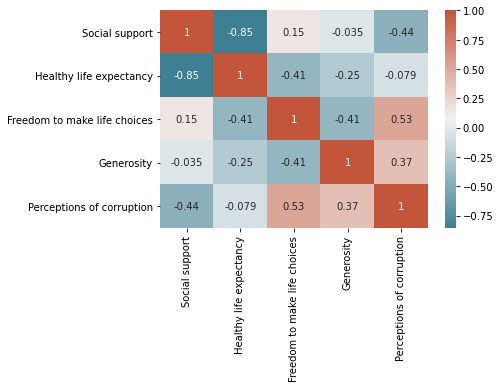

In [253]:
# Correlation matrix in Happiness Report Index
corr = result.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [254]:
# World Clouds for Tweets
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [259]:
text = " ".join(selected for selected in tweets.text.astype(str))
print ("There are {} words in the combination of all cells in column text.".format(len(text)))

There are 1916156 words in the combination of all cells in column YOUR_COLUMN_NAME.


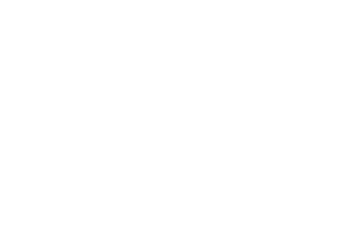

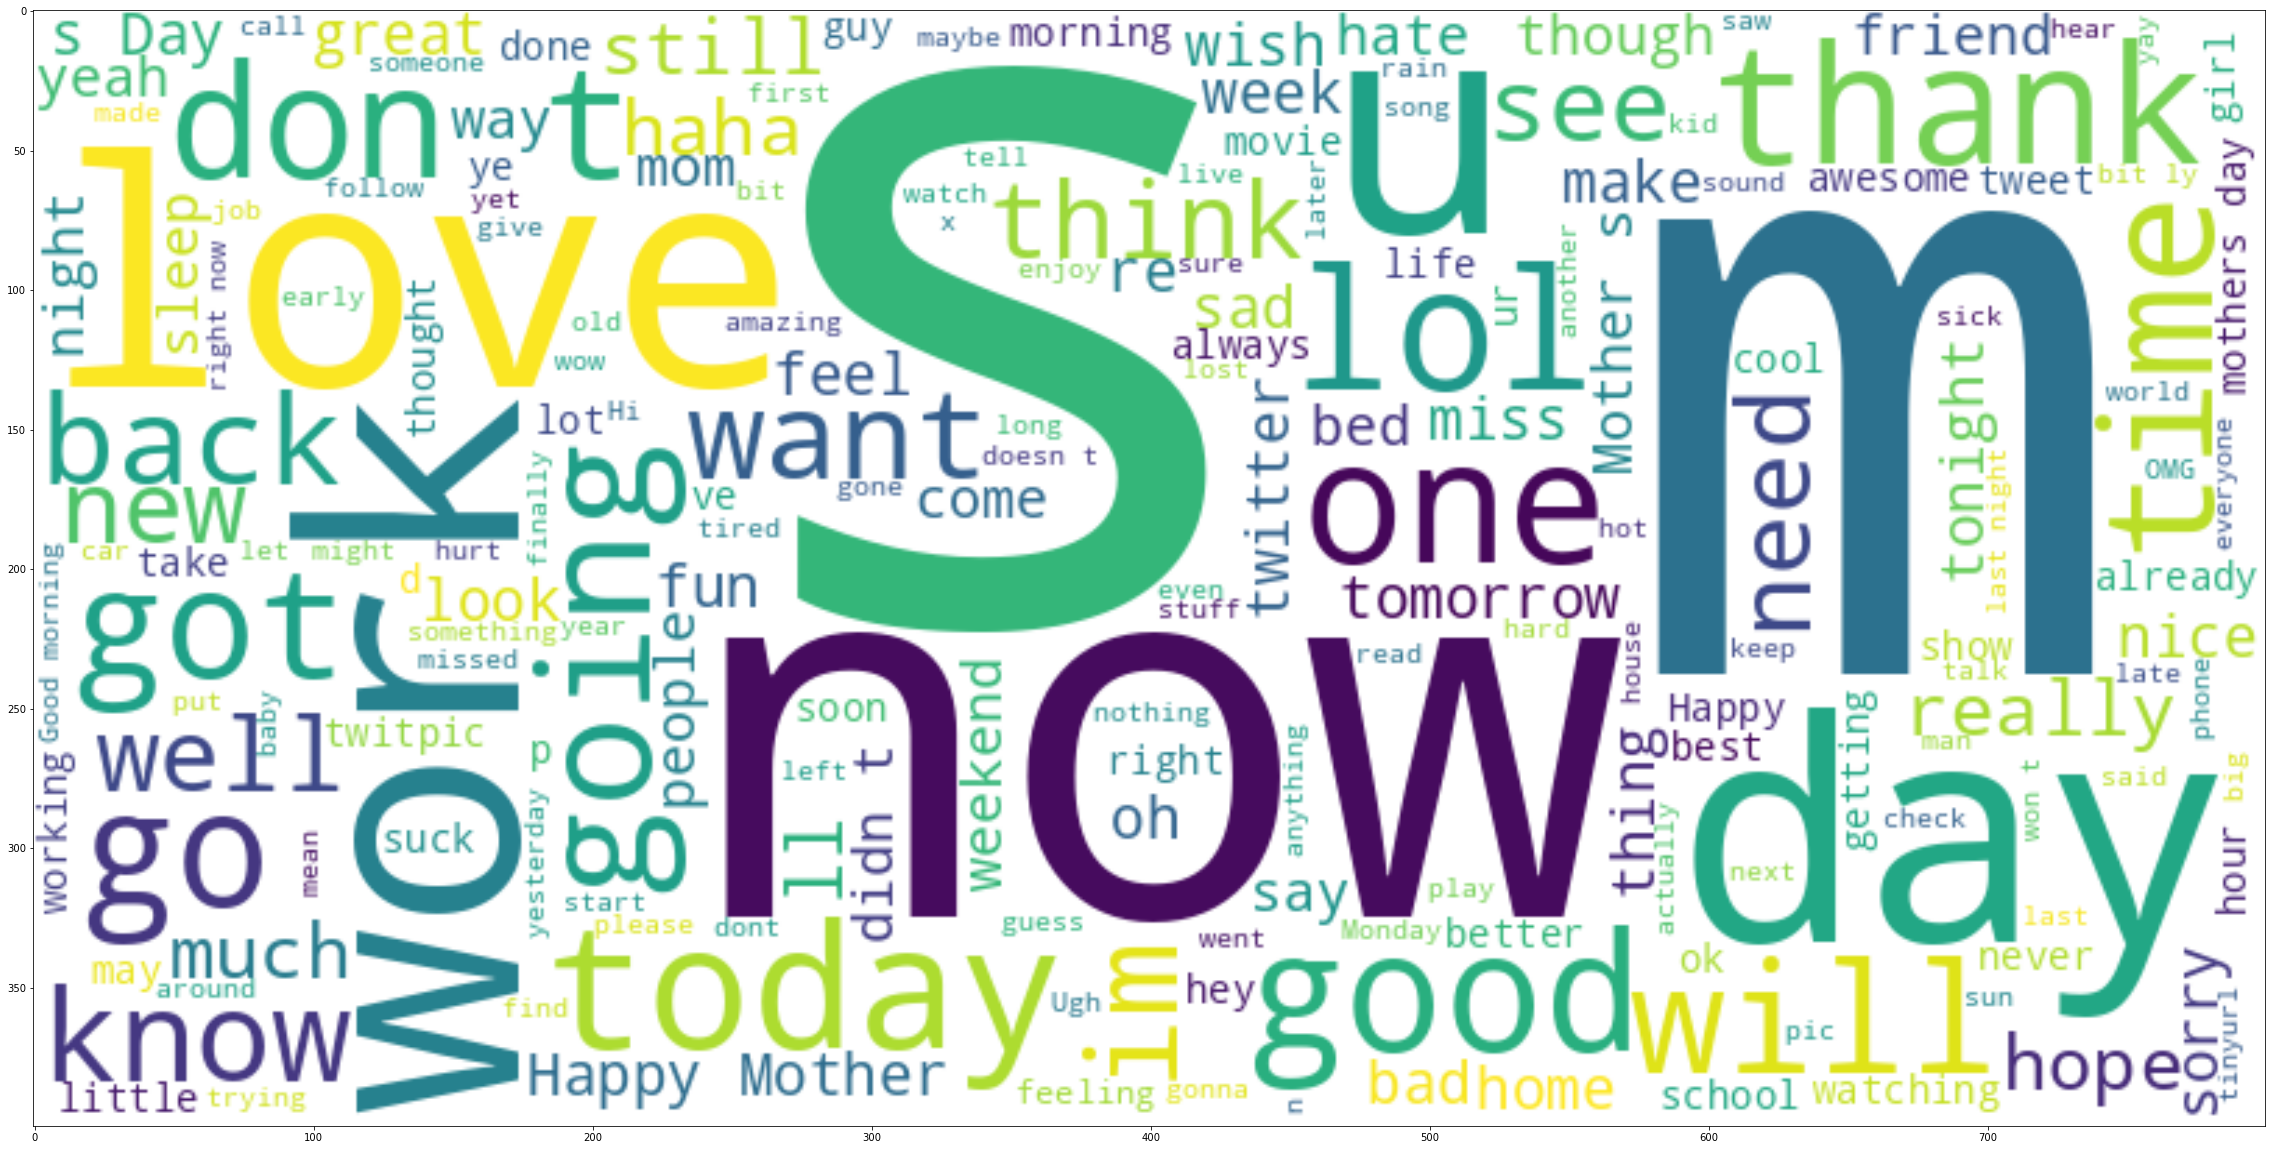

In [270]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400, min_font_size = 10).generate(text)

plt.axis("off")
plt.figure( figsize=(40,40))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

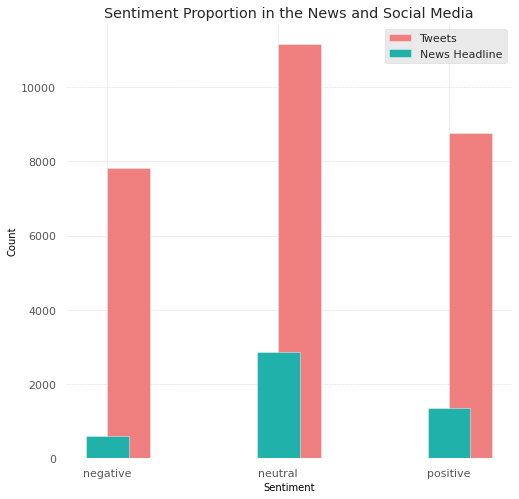

In [308]:
# Proportions of sentiment in Tweets and News Headline data
tweets_sentiment_count = tweets.groupby(by='new_sentiment').count()
news_sentiment_count = finance_news.groupby(by='Sentiment').count()
sentiment = pd.merge(tweets_sentiment_count, news_sentiment_count, left_index=True, right_index=True).reset_index()

# Plot Sentiment Proportions
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(sentiment['new_sentiment'], sentiment['textID'], color='lightcoral', width=0.25, align='edge')
ax.bar(sentiment['new_sentiment'], sentiment['News Headline'], color='lightseagreen', width=0.25,align='center')

ax.set_xlabel('Sentiment', fontsize=10, color='black')  # x label
ax.set_ylabel('Count', fontsize=10, color='black') # y label
ax.set_title("Sentiment Proportion in the News and Social Media") # graph title
ax.legend(['Tweets','News Headline'], loc ="best")  # graph legend

ax.set_facecolor('white')
ax.grid(color='lightgrey', linestyle='--', linewidth=0.5)

In [323]:
# What is the correlation between GDP per capita and happiness score?
gdp_per_cap_copy = GDP_per_capita.reset_index()
gdp_per_cap_copy.drop(gdp_per_cap_copy[gdp_per_cap_copy['index'] < '2016'].index, inplace=True)

In [324]:
gdp_per_cap_copy = gdp_per_cap_copy.set_index('index')
result_copy = result.copy()

corr_gdp_happ = pd.merge(gdp_per_cap_copy, result_copy, left_index=True, right_index=True)

In [333]:
# Correlation value
correlation = corr_gdp_happ['GDP per Capita (US$)'].astype(float).corr(corr_gdp_happ['Score'].astype(float))
print("The correlation between the GDP per Capita and Happiness score is {}".format(correlation))

The correlation between the GDP per Capita and Happiness score is -0.9821701898500371


In [374]:
# What is the correlation between the GDP and total tax revenue collected over the years?
total_tax = revenues.copy()
total_tax.drop(total_tax[total_tax['Revenue category'] != 'Total tax revenue'].index, inplace=True)

In [375]:
total_tax.drop(total_tax[total_tax['Level of government'] != 'Total'].index, inplace=True)

In [349]:
total_tax = total_tax.set_index('Year')

In [418]:
merged = pd.DataFrame(
                      columns=['Year','Total Tax'])
merged['Year'] = total_tax['Year']
merged['Total Tax']=total_tax['Value']
GDP_copy = GDP.copy().reset_index()
GDP_copy.drop(GDP_copy[GDP_copy['index'] == '2019'].index, inplace=True)
merged = merged.reset_index()
merged['GDP'] = GDP_copy['GDP(US$)'].astype(float)
merged

,index,Year,Total Tax,GDP
0,2603,2000,68909.123,2.068930e+09
1,2604,2001,83479.625,1.966668e+09
2,2605,2002,99050.248,1.965903e+09
3,2606,2003,121173.071,2.138245e+09
4,2607,2004,145514.313,2.376385e+09
5,2608,2005,174605.784,2.933282e+09
6,2609,2006,206392.283,3.319198e+09
7,2610,2007,255835.166,4.069636e+09
8,2611,2008,352996.612,5.179109e+09
9,2612,2009,389939.482,5.673410e+09


In [419]:
# Correlation value
correlation = merged['GDP'].corr(merged['Total Tax'])
print("The correlation between the GDP per Capita and Happiness score is {}".format(correlation))

The correlation between the GDP per Capita and Happiness score is 0.9510850008389155


<AxesSubplot:xlabel='Total Tax', ylabel='GDP'>

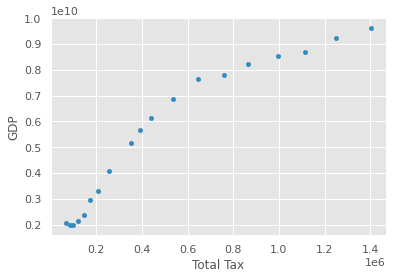

In [420]:
# Plotting the correlationg using scatter plot
merged.plot(kind='scatter', x='Total Tax', y='GDP')

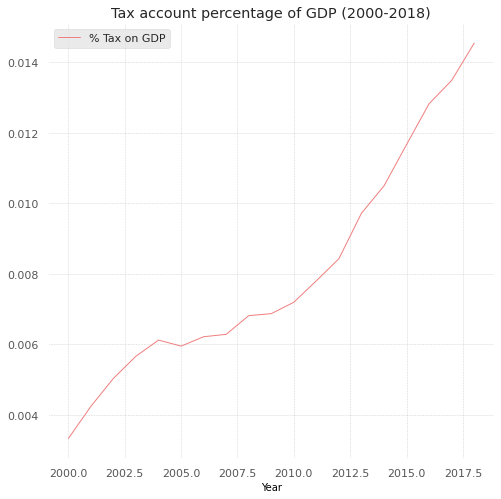

In [431]:
# What percentage of GDP does the tax account for (over the years )
merged['Percentage'] = merged.apply(lambda x: ((x['Total Tax']*1)/x['GDP'])*100, axis=1)

# Plotting the result
fig, ax2 = plt.subplots(figsize=(8,8))
ax2.plot(merged['Year'], merged['Percentage'], color='lightcoral', linewidth=1)

ax2.set_xlabel('Year', fontsize=10, color='black')  # x label
ax2.set_title("Tax account percentage of GDP (2000-2018)") # graph title
ax2.legend(['% Tax on GDP'], loc ="best")  # graph legend

ax2.set_facecolor('white')
ax2.grid(color='lightgrey', linestyle='--', linewidth=0.5)

In [449]:
# In what categories(What type of tax) did the government earn the most and least tax(over the years )?
tax_cat = revenues.copy()
#tax_cat.drop(tax_cat[tax_cat['Level of government'] != 'Total'].index, inplace=True)

In [454]:
tax_cat_copy = tax_cat[tax_cat['Revenue category'].str.lower().str.contains("tax")]
tax_cat_copy = tax_cat_copy.groupby('Revenue category').sum().sort_values(by='Value', ascending=False).reset_index()
tax_cat_copy

,Revenue category,Year,Value
0,Total tax and non-tax revenue,114513,3.252729e+07
1,Total tax and non-tax revenue excluding grants,114513,2.227934e+07
2,Total tax revenue,114513,1.981921e+07
3,Total non-tax revenue,114513,1.270807e+07
4,5000 Taxes on goods and services,114513,1.116423e+07
5,"5100 Taxes on production, sale, transfer, etc",76342,1.106372e+07
6,Non-tax revenue: Grants,114513,1.024794e+07
7,"1000 Taxes on income, profits and capital gains",114513,7.394824e+06
8,5111 Value added taxes,76342,6.044020e+06
9,5110 General taxes on goods and services,76342,6.044020e+06


/home/mahaly/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


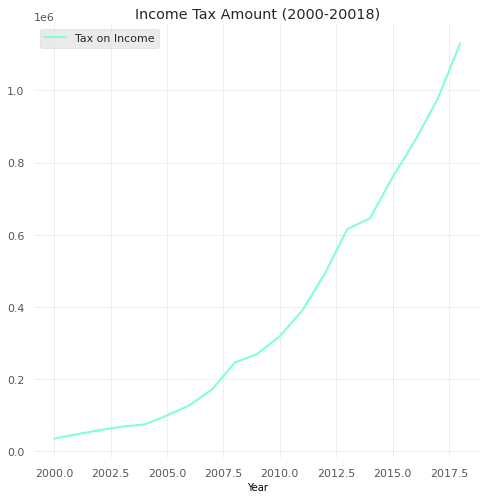

In [467]:
# How much income tax did the government collect tax(over the years )?
tax_income = tax_cat[tax_cat['Revenue category'].str.lower().str.contains("taxes on income")]
tax_income.drop(tax_income[tax_income['Level of government'] != 'Total'].index, inplace=True)
tax_income_copy = tax_income.groupby(['Year']).sum().reset_index()
tax_income_copy

# Plot the evolution of income tax collection over the years
fig, ax3 = plt.subplots(figsize=(8,8))
ax3.plot(tax_income_copy['Year'], tax_income_copy['Value'], color='aquamarine', linewidth=2)

ax3.set_xlabel('Year', fontsize=10, color='black')  # x label
ax3.set_title("Income Tax Amount (2000-20018)") # graph title
ax3.legend(['Tax on Income'], loc ="best")  # graph legend

ax3.set_facecolor('white')
ax3.grid(color='lightgrey', linestyle='--', linewidth=0.5)
